In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:22pt;}
div.prompt {min-width:70px;}
</style>
"""))

# 1. tensorflow v2.x에서 v1 사용하기

In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
# v1로 사용하기

Instructions for updating:
non-resource variables are not supported in the long term


In [6]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [9]:
# 간단한 수학 연산 수행(graph)
# tensorflow(그래프) 정의
node1 = tf.constant(10, dtype=tf.float32)
node2 = tf.constant(20, dtype=tf.float32)
node3 = tf.add(node1, node2)
# 그래프 실행
sess = tf.Session()
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


# Tensorflow
    - 그래프정의
    - sess = tf.Session()를 실행
    - sess.run()을 통해 값을 확인할 수 있음

In [11]:
import numpy as np
node1 = tf.constant(np.array([1,2,3]), dtype=tf.int16)
node2 = tf.cast(node1, dtype=tf.float32)
sess = tf.Session()
print(sess.run([node2, node1]))

[array([1., 2., 3.], dtype=float32), array([1, 2, 3], dtype=int16)]


In [14]:
data = np.array([1.,2.,3.,4.])
m = tf.reduce_mean(data) # reduce_mean : 평균값을 계산
sess = tf.Session()
print(sess.run(m))

2.5


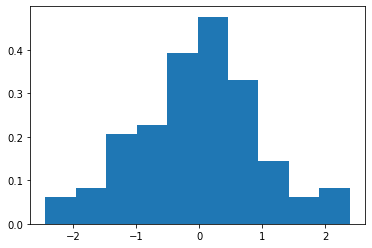

In [15]:
import matplotlib.pyplot as plt
tensor = tf.random_normal([100]) # random_normal : 평균0이고 표준편차가 1인 난수 
sess = tf.Session()
plt.hist(sess.run(tensor), density=True)
plt.show()

In [16]:
print(sess.run(tensor))

[-0.24276529 -0.55477476 -0.37514493  0.04589325 -0.81975764 -0.20840102
  0.02265284 -0.34158215  0.42829785 -1.0846243  -0.564131   -0.8519879
  0.7858068  -1.6315233   1.6406018   0.00372094  0.03063687 -0.7201313
  1.6488006  -1.3510745  -1.9413655  -1.1437134  -0.5466411   1.428748
 -1.6437948   0.82003033 -0.93279177 -1.0430737   0.9353089  -0.51174927
 -0.343275   -0.5035957  -0.05204893  1.6109179   2.1010594   1.5705905
  0.08787516 -0.23248473  0.73308104 -0.15425207  2.2772815   0.3344775
  0.2501862   0.15881567  0.4127343  -1.4332796   0.36375657 -0.5521105
 -0.09559972  0.5359753   0.07985366 -1.7111467  -1.095562   -0.301677
  0.25835043 -0.583999   -0.879646   -0.1124763  -0.9576313   1.435071
  1.2029157  -1.7383672   0.08359577 -0.44084314 -0.2917801   0.41432476
 -0.45032713 -0.03540134 -1.4928714   0.1780488  -0.06351084 -1.4688829
  0.2881356   1.5565256   0.760125    1.4438068   0.24243236  1.6590817
  1.6572913   0.35592955 -0.56974334 -1.637057    1.6565285  -1.

# 2. tensorflow v1을 이용한 linear regression을 구현

## 2.1 독립변수 x가 한개

In [3]:
# tensor graph 정의
# data set
x = np.array([1,2,3])
y = np.array([1,2,3])
# Weight 와 Bais (처음에는 랜덤값을 셋팅했다가 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# Hypothesis
H = W*x + b

# cost function(최소 제곱법)
cost = tf.reduce_mean(tf.square(H - y))

# 우리의 목적인 cost가 최소가 되는 W와 b를 찾는 것
'''
cost함수는 제곱의 평균인 2차함수이므로 곡선. 곡선위 미분값이 줄어드는 방향으로 학습
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Session
sess = tf.Session()
# variable 노드 (W, b) 초기화
sess.run(tf.global_variables_initializer())

# 6000번 학습 (v2에서는 fit함수)
# for step in range(1, 6001):
#     sess.run(train)
#     if step%300 == 0:
#         print("{}번째 cost:{}, W값:{}, b값:{}".format(step,
#                             sess.run(cost), sess.run(W), sess.run(b)))
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b])
    if step%300 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, cost_val, W_val, b_val))

300번째 cost:0.018069999292492867, W:[0.84424937], b:[0.3540578]
600번째 cost:0.004263786599040031, W:[0.9243431], b:[0.17198591]
900번째 cost:0.0010060779750347137, W:[0.9632492], b:[0.08354324]
1200번째 cost:0.0002373938768869266, W:[0.98214805], b:[0.04058165]
1500번째 cost:5.601510565611534e-05, W:[0.9913283], b:[0.01971285]
1800번째 cost:1.3217028026701882e-05, W:[0.99578774], b:[0.00957553]
2100번째 cost:3.1188283173833042e-06, W:[0.99795383], b:[0.00465148]
2400번째 cost:7.359669211837172e-07, W:[0.9990059], b:[0.00225963]
2700번째 cost:1.737816290869887e-07, W:[0.99951696], b:[0.00109804]
3000번째 cost:4.1080852497543674e-08, W:[0.9997651], b:[0.00053393]
3300번째 cost:9.745910745095898e-09, W:[0.9998856], b:[0.00026009]
3600번째 cost:2.322996461856519e-09, W:[0.9999441], b:[0.00012685]
3900번째 cost:5.600612751344158e-10, W:[0.9999724], b:[6.22523e-05]
4200번째 cost:1.2846712582614828e-10, W:[0.9999868], b:[2.9929184e-05]
4500번째 cost:3.3752160788491636e-11, W:[0.9999932], b:[1.5156723e-05]
4800번째 cost:1.

In [4]:
sess.run([W, b])

[array([0.99999774], dtype=float32), array([4.490244e-06], dtype=float32)]

In [5]:
W_, b_ = sess.run([W, b])

In [6]:
print('최종적으로 나온 회귀식 : H = {}*x + {}'.format(W_[0], b_[0]))

최종적으로 나온 회귀식 : H = 0.9999977350234985*x + 4.4902440095029306e-06


In [8]:
# tensor graph 정의
x = [1,2,3]
y = [1,2,3]
# Weight 와 Bias
W = tf.Variable(100.0, name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost(최소제곱법)
cost = tf.reduce_mean(tf.square(H - y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
# session
sess = tf.Session()
# b노드 초기화
sess.run(tf.global_variables_initializer())
# 4000번 학습
for step in range(1, 4001):
    cost_val, W_val, b_val = sess.run([cost, W, b])
    if step%300 == 1:
        print("{}번째cost:{},W:{},b:{}".format(step, cost_val, W_val, b_val))
    sess.run(train)        

1번째cost:45126.41796875,W:100.0,b:[-1.5504633]
301번째cost:48.33587646484375,W:9.074782371520996,b:[-18.355875]
601번째cost:11.405316352844238,W:4.922379016876221,b:[-8.916491]
901번째cost:2.6911942958831787,W:2.905322313308716,b:[-4.3312454]
1201번째cost:0.6350122690200806,W:1.9255224466323853,b:[-2.1039302]
1501번째cost:0.14983713626861572,W:1.4495785236358643,b:[-1.0219978]
1801번째cost:0.03535548970103264,W:1.2183858156204224,b:[-0.4964421]
2101번째cost:0.008342458866536617,W:1.1060823202133179,b:[-0.24115013]
2401번째cost:0.001968465046957135,W:1.051529884338379,b:[-0.11713974]
2701번째cost:0.0004644753353204578,W:1.0250309705734253,b:[-0.05690132]
3001번째cost:0.00010959615610772744,W:1.0121588706970215,b:[-0.02764]
3301번째cost:2.5860723326331936e-05,W:1.005906343460083,b:[-0.01342642]
3601번째cost:6.10237157161464e-06,W:1.0028691291809082,b:[-0.00652212]
3901번째cost:1.4404059811568004e-06,W:1.0013940334320068,b:[-0.00316866]


## 2.2 predict를 하기 위한 placeholder 이용

In [10]:
# placeholder 이용
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
# ab = tf.add(a, b)
ab = a + b
sess = tf.Session()
# placeholder는 그래프 실행단계에서 값을 던져줌
sess.run(ab, feed_dict={a:10, b:20})

30.0

In [11]:
sess.run(a, feed_dict={a: [1,2,3]})

array([1., 2., 3.], dtype=float32)

In [12]:
sess.run(ab, feed_dict={a:np.array([10,20,30]),
                        b:np.array([1,2,3])})

array([11., 22., 33.], dtype=float32)

In [17]:
# data set (H = 2x + 3)
x_data = np.array([1, 2, 3])
y_data = np.array([5, 7, 9])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data, y:y_data})
    if step % 200 == 1:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                        cost_val, W_val, b_val))

1번째 cost:51.150943756103516, W:[0.38343972], b:[0.00431259]
201번째 cost:0.20167481899261475, W:[2.520327], b:[1.8171744]
401번째 cost:0.07700943946838379, W:[2.3215308], b:[2.2690847]
601번째 cost:0.029406212270259857, W:[2.198687], b:[2.5483372]
801번째 cost:0.01122860237956047, W:[2.1227765], b:[2.720901]
1001번째 cost:0.004287672694772482, W:[2.0758681], b:[2.8275335]
1201번째 cost:0.001637259148992598, W:[2.0468822], b:[2.8934257]
1401번째 cost:0.0006251764134503901, W:[2.02897], b:[2.9341438]
1601번째 cost:0.00023872785095591098, W:[2.017902], b:[2.9593039]
1801번째 cost:9.115678403759375e-05, W:[2.0110621], b:[2.9748528]
2001번째 cost:3.480592567939311e-05, W:[2.006836], b:[2.9844606]
2201번째 cost:1.3291144568938762e-05, W:[2.004224], b:[2.9903975]
2401번째 cost:5.076972684037173e-06, W:[2.0026107], b:[2.9940655]
2601번째 cost:1.940426727742306e-06, W:[2.001614], b:[2.9963315]
2801번째 cost:7.423800525430124e-07, W:[2.000999], b:[2.9977305]
3001번째 cost:2.849014038019959e-07, W:[2.0006187], b:[2.9985948]
3

In [18]:
sess.run([W, b])

[array([2.000026], dtype=float32), array([2.999942], dtype=float32)]

In [19]:
# 예측해 보기
sess.run(H, feed_dict={x:5})

array([13.000072], dtype=float32)

In [20]:
sess.run(H, feed_dict={x:np.array([1,10,20])})

array([ 4.999968, 23.000202, 43.00046 ], dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression을 구현

In [22]:
x_data = np.array([1,2,5,8,10])
y_data = np.array([5,15,68,80,95])

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 60001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data, y:y_data})
    if step % 2000 == 1:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                        cost_val, W_val, b_val))

1번째 cost:4801.3359375, W:[7.6819906], b:[0.9656844]
2001번째 cost:79.13945007324219, W:[10.159862], b:[-0.23127915]
4001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
6001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
8001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
10001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
12001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
14001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
16001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
18001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
20001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
22001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
24001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
26001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
28001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.23128368]
30001번째 cost:79.13946533203125, W:[10.1598625], b:[-0.231

In [24]:
# 최종적으로 계산된 W, b
sess.run([W, b])

[array([10.1598625], dtype=float32), array([-0.23128368], dtype=float32)]

In [25]:
# 예측을 할 수는 있으나 cost가 너무 큰 값이라 믿을 수 없음
sess.run(H, feed_dict={x:5})

array([50.568027], dtype=float32)

In [ ]:
# 예측이 제대로 안되는 이유 : GradientDescentOptimier에서 local최소값을 만나면
# 멈춤(global 최소값이 따로 있어도)

## scale이 다른 데이터들의 linear regression을 구현

In [22]:
x_data = np.array([1,2,5,8,10]).reshape(-1,1)
y_data = np.array([5,15,68,80,95]).reshape(-1,1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)
scaler_y = MinMaxScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)

# placeholder 설정
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)
# Weight & bias
W = tf.Variable(tf.random.normal([1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
# Hypothesis
H = W*x + b
# cost function
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)
#Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(1, 60001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b],
                                        feed_dict={x:x_data, y:y_data})
    if step % 2000 == 1:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                        cost_val, W_val, b_val))

1번째 cost:1.5963890552520752, W:[2.0405822], b:[0.741893]
2001번째 cost:0.0097738616168499, W:[1.0208617], b:[0.05218678]
4001번째 cost:0.00977030023932457, W:[1.0160378], b:[0.05473504]
6001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
8001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
10001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
12001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
14001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
16001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
18001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
20001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
22001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
24001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
26001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
28001번째 cost:0.009770305827260017, W:[1.0160072], b:[0.0547521]
30001번째 cost:0.009770305827260017, W:[1.0160072], b:

In [23]:
scaled_input = scaler_x.transform(np.array([[2]]))
scaler_y.inverse_transform(sess.run(H, feed_dict={x: scaled_input}))

array([[20.08776]], dtype=float32)

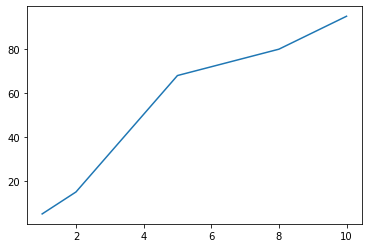

In [24]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 5, 8,10], [5,15,68,80,95])

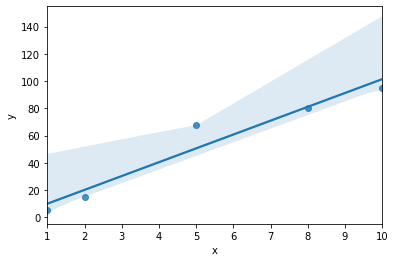

In [9]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':[1,2,5,8,10],
                  'y':[5,15,68,80,95]})
sns.regplot(data=df, x='x', y='y')
plt.show()

In [4]:
# 컴퓨터를 on한 후에
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 3. 독립변수 x가 여러 개인 linear regression
    * 교안 pt. 25

In [12]:
# data set
x_data = np.array([[73,80,75],
                   [93,88,93],
                   [89,91,90],
                   [96,98,100],
                   [73,66,70]])
y_data = np.array([[152], 
                   [185], [180],[196],[142]])
# tensor graph 정의
# placeholder (None을 쓰는 이유:x_data도 받고, 예측할 때도 쓰고...)
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# Weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3,1]), name='weight')
b = tf.Variable(tf.random_normal([1]) ,  name='bias')

# Hypothesis
# H = X @ W + b
H = tf.matmul(X, W) + b

# cost
cost = tf.reduce_mean(tf.square(H - Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{}번재 cost:{}".format(step, cost_val))

3000번재 cost:2.771414279937744
6000번재 cost:1.142431616783142
9000번재 cost:0.7600520849227905
12000번재 cost:0.631294846534729
15000번재 cost:0.5596858859062195
18000번재 cost:0.505583643913269
21000번재 cost:0.4603424668312073
24000번재 cost:0.4215315878391266
27000번재 cost:0.3880405128002167
30000번재 cost:0.3590868413448334
33000번재 cost:0.3340601623058319
36000번재 cost:0.31241098046302795
39000번재 cost:0.2937018871307373
42000번재 cost:0.2775212824344635
45000번재 cost:0.2635246217250824
48000번재 cost:0.2514258325099945
51000번재 cost:0.24095439910888672
54000번재 cost:0.23190554976463318
57000번재 cost:0.2240757942199707
60000번재 cost:0.21730096638202667


In [13]:
# 학습후 최종적으로 산출된 W, b
sess.run([W, b])

[array([[0.9708886 ],
        [0.48234692],
        [0.5617717 ]], dtype=float32),
 array([-0.2627642], dtype=float32)]

In [14]:
# 예측해보기
sess.run(H, feed_dict={X:np.array([[73,80,72]])})

array([[149.64742]], dtype=float32)

# 4. Ozone량 예측 예제(scale 조정 필요)
    * 독립변수 x가 3개 - Multi-variable Linear Regression

In [17]:
# csv파일을 numpy배열로(np.loadtxt('파일명'))
# data = np.loadtxt('./data/ozone.csv', delimiter=',') NA, header

In [44]:
# dataset 생성
# csv 파일을 데이터프레임으로 -> 결측치 ->  독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')
# ML이나 DL에서는 결측치 정제 작업 필요
data = data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 column만 추출
data = data[['Ozone','Solar.R', 'Wind','Temp']]

# 독립변수(Solar,R, Wind, Temp), 종속변수(Ozone) 분리
# x_data = np.array(data[['Solar.R', 'Wind','Temp']])
x_data = data[['Solar.R', 'Wind','Temp']].values # 데이터프레임을 array로 변환
# y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight vs bias   # 독립변수갯수:3, 종속변수갯수:1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# H = X @ W + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

3000번째 cost : 489.6812744140625
6000번째 cost : 465.6639709472656
9000번째 cost : 462.8270568847656
12000번째 cost : 462.4707336425781
15000번째 cost : 462.4048767089844
18000번째 cost : 462.37310791015625
21000번째 cost : 462.3453369140625
24000번째 cost : 462.3180236816406
27000번째 cost : 462.29083251953125
30000번째 cost : 462.26348876953125
33000번째 cost : 462.2362976074219
36000번째 cost : 462.2091064453125
39000번째 cost : 462.1818542480469
42000번째 cost : 462.1546630859375
45000번째 cost : 462.12750244140625
48000번째 cost : 462.10028076171875
51000번째 cost : 462.0732116699219
54000번째 cost : 462.0459899902344
57000번째 cost : 462.0188293457031
60000번째 cost : 461.99188232421875


In [41]:
data[1:2]

,Ozone,Solar.R,Wind,Temp
1,36.0,118.0,8.0,72


In [42]:
sess.run(H, feed_dict={X:np.array([[118, 8, 72]])})

array([[41.42024]], dtype=float32)

In [ ]:
# scale 맞추는 방법 : normalization(정규화), standardization(표준화)
                    # 평균이 0, 표준편차 1
#                   X - Xmin
# normalization = ───────────── (정규화 공식. 많이 씀)
#                  Xmax - Xmin
# 위의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.MinMaxScaler 이용)
#                    X - Xmean
# standardization = ───────────── (표준화 공식)
#                    Xstd(표준편차)
# 위의 식을 써도 되지만 라이브러리 씀(sklearn.preprocessing.StandardScaler 이용)

In [45]:
# standardization(표준화)

In [51]:
# dataset 생성
# csv 파일을 데이터프레임으로 -> 결측치 ->  독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')
# ML이나 DL에서는 결측치 정제 작업 필요
data = data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 column만 추출
data = data[['Ozone','Solar.R', 'Wind','Temp']]
#                    X - Xmean
# standardization = ───────────── (표준화 공식)
#                    Xstd(표준편차)
data['Ozone'] = (data['Ozone'] - data['Ozone'].mean()) / data['Ozone'].std()
data['Solar.R'] = (data['Solar.R'] - data['Solar.R'].mean()) / \
                                                data['Solar.R'].std()
data['Wind'] = (data['Wind'] - data['Wind'].mean()) / data['Wind'].std()
data['Temp'] = (data['Temp'] - data['Temp'].mean()) / data['Temp'].std()

# 독립변수(Solar,R, Wind, Temp), 종속변수(Ozone) 분리
# x_data = np.array(data[['Solar.R', 'Wind','Temp']])
x_data = data[['Solar.R', 'Wind','Temp']].values # 데이터프레임을 array로 변환
# y_data = data['Ozone'].values.reshape(-1,1)
y_data = data[['Ozone']].values
print(x_data.shape, y_data.shape)

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight vs bias   # 독립변수갯수:3, 종속변수갯수:1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# H = X @ W + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

(111, 3) (111, 1)
3000번째 cost : 0.39086291193962097
6000번째 cost : 0.3905560374259949
9000번째 cost : 0.39055493474006653
12000번째 cost : 0.39055493474006653
15000번째 cost : 0.39055493474006653
18000번째 cost : 0.39055493474006653
21000번째 cost : 0.39055493474006653
24000번째 cost : 0.39055493474006653
27000번째 cost : 0.39055493474006653
30000번째 cost : 0.39055493474006653
33000번째 cost : 0.39055493474006653
36000번째 cost : 0.39055493474006653
39000번째 cost : 0.39055493474006653
42000번째 cost : 0.39055493474006653
45000번째 cost : 0.39055493474006653
48000번째 cost : 0.39055493474006653
51000번째 cost : 0.39055493474006653
54000번째 cost : 0.39055493474006653
57000번째 cost : 0.39055493474006653
60000번째 cost : 0.39055493474006653


In [52]:
sess.run([W,b])

[array([[ 0.16385868],
        [-0.35639715],
        [ 0.4731631 ]], dtype=float32),
 array([1.4903614e-08], dtype=float32)]

In [ ]:
# standardization을 API를 이용해서 scale조정

In [65]:
# dataset 생성
# csv 파일을 데이터프레임으로 -> 결측치 ->  독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')
# ML이나 DL에서는 결측치 정제 작업 필요
data = data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 column만 추출
data = data[['Ozone','Solar.R', 'Wind','Temp']]

# scale 조정 : API 를 이용해서 한꺼번에 scale 조정
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(data)
# data = pd.DataFrame(scaler.transform(data), 
#                     columns=['Ozone', 'Solar.R', 'Wind','Temp'])
# display(data)

# 독립변수(Solar,R, Wind, Temp), 종속변수(Ozone) 분리
x_data = data[['Solar.R', 'Wind','Temp']].values # 데이터프레임을 array로 변환
y_data = data[['Ozone']].values
print(x_data.shape, y_data.shape)

# scale 조정
print('조정 전 \n', np.c_[x_data[:2], y_data[:2]])
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data = scaler_x.transform(x_data)
# x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
scaler_y.fit(y_data)
y_data = scaler_y.transform(y_data)
print('조정 후 \n', np.c_[x_data[:2], y_data[:2]])
# scale 조정된 데이터를 다시 원데이터로 해석
# original_x = scaler_x.inverse_transform(x_data)
# original_y = scaler_y.inverse_transform(y_data)
# print('원상복구 후 \n', np.c_[original_x[:2], original_y[:2]])

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight vs bias   # 독립변수갯수:3, 종속변수갯수:1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# H = X @ W + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

(111, 3) (111, 1)
조정 전 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정 후 
 [[ 0.05728624 -0.71707784 -1.13764691 -0.03317961]
 [-0.73618283 -0.54766534 -0.61060682 -0.18411965]]
3000번째 cost : 0.3956371545791626
6000번째 cost : 0.3941105902194977
9000번째 cost : 0.3941054344177246
12000번째 cost : 0.3941054046154022
15000번째 cost : 0.3941054046154022
18000번째 cost : 0.3941054046154022
21000번째 cost : 0.3941054046154022
24000번째 cost : 0.3941054046154022
27000번째 cost : 0.3941054046154022
30000번째 cost : 0.3941054046154022
33000번째 cost : 0.3941054046154022
36000번째 cost : 0.3941054046154022
39000번째 cost : 0.3941054046154022
42000번째 cost : 0.3941054046154022
45000번째 cost : 0.3941054046154022
48000번째 cost : 0.3941054046154022
51000번째 cost : 0.3941054046154022
54000번째 cost : 0.3941054046154022
57000번째 cost : 0.3941054046154022
60000번째 cost : 0.3941054046154022


In [66]:
input_data = np.array([[118,8,72]])
scaled_input_data = scaler_x.transform(input_data)
scaled_input_data

array([[-0.73618283, -0.54766534, -0.61060682]])

In [68]:
scaler_y.inverse_transform(sess.run(H, feed_dict={X: scaled_input_data}) )

array([[34.999157]], dtype=float32)

In [ ]:
# Normalization(정규화, 많이 씀)

In [71]:
# dataset 생성
# csv 파일을 데이터프레임으로 -> 결측치 ->  독립변수, 종속변수 분리
data = pd.read_csv('./data/ozone.csv', sep=',')
# ML이나 DL에서는 결측치 정제 작업 필요
data = data.dropna(how='any', axis=0) # 결측치가 한 열이라도 있는 행 삭제
# 필요한 column만 추출
data = data[['Ozone','Solar.R', 'Wind','Temp']]

# 독립변수(Solar,R, Wind, Temp), 종속변수(Ozone) 분리
x_data = data[['Solar.R', 'Wind','Temp']].values # 데이터프레임을 array로 변환
y_data = data[['Ozone']].values
print(x_data.shape, y_data.shape)

print('조정 전 \n', np.c_[x_data[:2], y_data[:2]])
from sklearn.preprocessing import MinMaxScaler
scale_x = MinMaxScaler()
scale_x.fit(x_data)
x_data = scale_x.transform(x_data)
# x_data = scale_x.fit_transform(x_data)
scale_y = MinMaxScaler()
scale_y.fit(y_data)
y_data = scale_y.transform(y_data)
print('조정 후 \n', np.c_[x_data[:2], y_data[:2]])

# tensorflow 구현
# 1. X, Y
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)
# 2. weight vs bias   # 독립변수갯수:3, 종속변수갯수:1
W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
# 3. Hypothesis
H = tf.matmul(X, W) + b
# H = X @ W + b
# 4. cost 함수
cost = tf.reduce_mean(tf.square(H - Y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-3).minimize(cost)
# 6. Session & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 7. 학습
for step in range(1, 60001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step % 3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

(111, 3) (111, 1)
조정 전 
 [[190.    7.4  67.   41. ]
 [118.    8.   72.   36. ]]
조정 후 
 [[0.55963303 0.27717391 0.25       0.23952096]
 [0.33944954 0.30978261 0.375      0.20958084]]
3000번째 cost : 0.07392982393503189
6000번째 cost : 0.047120869159698486
9000번째 cost : 0.03291384130716324
12000번째 cost : 0.02529468759894371
15000번째 cost : 0.021157052367925644
18000번째 cost : 0.01887725107371807
21000번째 cost : 0.017598219215869904
24000번째 cost : 0.016863778233528137
27000번째 cost : 0.016429316252470016
30000번째 cost : 0.016162695363163948
33000번째 cost : 0.015991931781172752
36000번째 cost : 0.015877434983849525
39000번째 cost : 0.01579706184566021
42000번째 cost : 0.015738267451524734
45000번째 cost : 0.015693750232458115
48000번째 cost : 0.015659119933843613
51000번째 cost : 0.015631629154086113
54000번째 cost : 0.015609496273100376
57000번째 cost : 0.015591494739055634
60000번째 cost : 0.015576759353280067


In [74]:
# 8. 예측(모델 사용해 보기)
input_data = np.array([[118, 8, 72]])
scaled_input_data = scale_x.transform(input_data)
predict_value = sess.run(H, feed_dict={X:scaled_input_data})
scale_y.inverse_transform(predict_value)

array([[33.366882]], dtype=float32)

# 5. logistic Regression = Binary classification
- logistic Regression은 기존의 linear Regression과 다르게 처리)

w값: 0.12925170068027214 b값: -0.27210884353741516


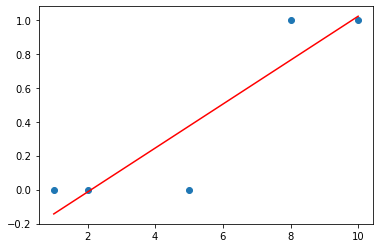

In [80]:
from scipy import stats
x = np.array([1, 2, 5, 8, 10])
y = np.array([0, 0, 0, 1, 1])
lm = stats.linregress(x, y)
print('w값:', lm[0], 'b값:',lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

w값: 0.03500583430571762 b값: 0.1732788798133022


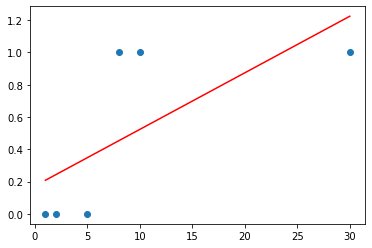

In [81]:
from scipy import stats
x = np.array([1, 2, 5, 8, 10, 30])
y = np.array([0, 0, 0, 1, 1,  1])
lm = stats.linregress(x, y)
print('w값:', lm[0], 'b값:',lm[1])
plt.scatter(x, y)
plt.plot(x, x*lm[0]+lm[1], 'r')

In [11]:
# 교안 pt. 50
x_data = np.array([[10,0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])

# X, Y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# sess & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%600 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

600번째 cost : 0.21816448867321014
1200번째 cost : 0.17801730334758759
1800번째 cost : 0.1541936695575714
2400번째 cost : 0.13671015202999115
3000번째 cost : 0.1228538304567337
3600번째 cost : 0.11146502196788788
4200번째 cost : 0.10190384835004807
4800번째 cost : 0.09375964850187302
5400번째 cost : 0.08674440532922745
6000번째 cost : 0.08064548671245575


In [12]:
# accuracy
predict = tf.cast(H>0.5, dtype=tf.float32)
# sess.run(predict, feed_dict={X:x_data})
correct = tf.equal(predict, Y) # True, True, True, True, True, True, True
# sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("정확도 :", sess.run(accuracy, feed_dict={X:x_data, Y:y_data}))

정확도 : 1.0


In [13]:
# 예측(모델 사용하기)
print("H결과 \n", sess.run(H, feed_dict={X:np.array([[10,3]])}))
print("predict 결과 :", sess.run(predict, feed_dict={X:np.array([[10,3]])}))

H결과 
 [[0.999999]]
predict 결과 : [[1.]]


# 6. multinomial classification(3개 이상 그룹)
- 교안 pt. 54 퀴즈 1,2,3 성적과 출석에 따른 A,B,C 등급 분류

In [15]:
x_data = np.array([[10,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])

# 종속변수가 다중분류면 원핫인코딩 (pt. 58)
# from tensorflow.keras.utils import to_categorical
# to_categorical(y_data) # 숫자 데이터가 아니라 바로 원핫인코딩 불가

# 원핫인코딩 방법1
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
encoder = LabelEncoder()
# encoder.fit(y_data)
# y_data = encoder.transform(y_data)
y_data = encoder.fit_transform(y_data)
y_data = to_categorical(y_data)

# 원핫인코딩 방법2
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)
y_data = pd.get_dummies(y_data).values

# 원핫인코딩 방법3
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
y_data = pd.DataFrame(y_data)
y_data = pd.get_dummies(y_data).values
y_data

# X, Y placeholder
X = tf.placeholder(shape=[None,4], dtype=tf.float32)
Y = tf.placeholder(shape=[None,3], dtype=tf.float32)

# weight & bias
W = tf.Variable(tf.random_normal([4,3]), name="weight")
b = tf.Variable(tf.random_normal([3]), name="bias")

# Hypothesis
logits = tf.matmul(X, W) + b
# H = tf.nn.sigmoid(logits) # binary classfication
H = tf.nn.softmax(logits) # softmax 최동단계 결과들의 합이 1

# cost
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 9001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%600 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

600번째 cost : 1.4872767925262451
1200번째 cost : 0.8867256045341492
1800번째 cost : 0.06066885218024254
2400번째 cost : 0.04862920567393303
3000번째 cost : 0.04163992777466774
3600번째 cost : 0.03676890581846237
4200번째 cost : 0.033082447946071625
4800번째 cost : 0.03015228733420372
5400번째 cost : 0.027745964005589485
6000번째 cost : 0.025722835212945938
6600번째 cost : 0.023991435766220093
7200번째 cost : 0.022488849237561226
7800번째 cost : 0.021170122548937798
8400번째 cost : 0.020001739263534546
9000번째 cost : 0.018958469852805138


In [17]:
# 예측
y_hat = sess.run(H, feed_dict={X:[[10,7, 8, 5]]})
print(y_hat)
print(y_hat.argmax(axis=1))

[[9.6415818e-01 3.5841819e-02 1.5827326e-12]]
[0]


In [18]:
# accuracy 측정
# H -> 0.99 0.002 0.008 -> H.argmax -> 0
# Y -> 1    0     0     -> Y.argmax -> 0
predict = tf.argmax(H, axis=1)
# predict = H.argmax(axis=1)
correct = tf.equal(predict, tf.argmax(Y, axis=1))
# sess.run(correct, feed_dict={X:x_data, Y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print(sess.run(accuracy, feed_dict={X:x_data, Y:y_data}) * 100, "%")

100.0 %


# 7. XOR(교안 pt.77)

In [19]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]]) # 넘파이 어레이로 만들지 않아도 텐서 안에 들어가면 배열이 됨
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])

# X, Y
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Weight & bias
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# Hypothesis
logits = tf.matmul(X, W) + b
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - Y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화 
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 20001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))

3000번째 cost : 0.6937299966812134
6000번째 cost : 0.6932015419006348
9000번째 cost : 0.6931523084640503
12000번째 cost : 0.6931476593017578
15000번째 cost : 0.6931471824645996
18000번째 cost : 0.6931471824645996


In [20]:
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y) # False(0) False(0) True(1) True(1)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, Y:y_data})

0.75

# 8. Deep Learning XOR 예제

In [21]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력4)
W1 = tf.Variable(tf.random_normal([2,4]), name="weight1")
b1 = tf.Variable(tf.random_normal([4]), name="bias1")
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1)

# layer2의 weight * bias (layer2 = 입력4, 출력1)
W2 = tf.Variable(tf.random_normal([4,1]), name="weight2")
b2 = tf.Variable(tf.random_normal([1]), name="bias2")

# Hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 100001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%3000 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
        
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, Y:y_data})

3000번째 cost : 0.6291540861129761
6000번째 cost : 0.5647768974304199
9000번째 cost : 0.49136990308761597
12000번째 cost : 0.40421658754348755
15000번째 cost : 0.31516337394714355
18000번째 cost : 0.2395339012145996
21000번째 cost : 0.18388858437538147
24000번째 cost : 0.1445547640323639
27000번째 cost : 0.11647474020719528
30000번째 cost : 0.09591524302959442
33000번째 cost : 0.08045263588428497
36000번째 cost : 0.06854581832885742
39000번째 cost : 0.05919639393687248
42000번째 cost : 0.05173468589782715
45000번째 cost : 0.04569505155086517
48000번째 cost : 0.0407438650727272
51000번째 cost : 0.036638326942920685
54000번째 cost : 0.03319626301527023
57000번째 cost : 0.030281946063041687
60000번째 cost : 0.027791034430265427
63000번째 cost : 0.025643981993198395
66000번째 cost : 0.023779371753335
69000번째 cost : 0.022146932780742645
72000번째 cost : 0.020708836615085602
75000번째 cost : 0.019433777779340744
78000번째 cost : 0.0182962566614151
81000번째 cost : 0.017277797684073448
84000번째 cost : 0.01635950431227684
87000번째 cost : 0.015530

1.0

In [ ]:
# dataset
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])

# placeholder
X = tf.placeholder(shape=[None, 2], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random_normal([2,10]), name="weight1")
b1 = tf.Variable(tf.random_normal([10]), name="bias1")
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2의 weight * bias (layer2 = 입력10, 출력20)
W2 = tf.Variable(tf.random_normal([10,20]), name="weight2")
b2 = tf.Variable(tf.random_normal([20]), name="bias2")
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3의 weight * bias (layer3 = 입력20, 출력10)
W3 = tf.Variable(tf.random_normal([20,10]), name="weight3")
b3 = tf.Variable(tf.random_normal([10]), name="bias3")
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4의 weight * bias (layer4 = 입력10, 출력1)
W4 = tf.Variable(tf.random_normal([10,1]), name="weight4")
b4 = tf.Variable(tf.random_normal([1]), name="bias4")

# Hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val = sess.run([train, cost], feed_dict={X:x_data, Y:y_data})
    if step%300 == 0:
        print("{}번째 cost : {}".format(step, cost_val))
        
# accuracy 측정
predict = tf.cast(H>0.5, dtype=tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
sess.run(accuracy, feed_dict={X:x_data, Y:y_data})